###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Assignment 1: Music genre classification with naive Bayes


**Student ID(s):**     1160170


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
def preprocess(path):
    data = pd.read_csv(path)
    data = data.drop(columns='filename') # 'filename' column does not provide any useful information
    return data

In [3]:
# calculate the mean for every label and attribute
def calc_mean(data):
    mean = data.groupby("label").mean().sort_index()
    return mean

In [4]:
# calculate the standard deviation for every label and attribute
def calc_sd(data):
    sd = data.groupby("label").std().sort_index()
    return sd

In [5]:
# This function should calculat prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model
def train(data):
   prior = data['label'].value_counts(normalize=True,sort=False) # calculate the probability in order
   mean = calc_mean(data)
   sd = calc_sd(data)
   return prior, mean, sd # need name then call

In [6]:
# predict the label of one instance
def predict_from_one_sample(sample, prior, mean, sd):
    prior = np.log(prior)
    likelihood = np.log(norm.pdf(sample,mean,sd)).sum(axis=1) #likelihood of a single instance
    joint_prob = prior + likelihood 
    posterior = joint_prob - np.log(np.sum(np.exp(joint_prob))) # calculate the posterior probability 
    prediction = posterior.index[np.argmax(posterior)]
    return prediction

In [7]:
# This function should predict classes for new items in a test dataset
def predict(data, prior, mean, sd):
    predictions = []
    for i in data.index:
        sample = data.iloc[[i], data.columns != 'label'] 
        prediction = predict_from_one_sample(sample, prior, mean, sd)
        predictions.append(prediction)
    return pd.Series(predictions)

In [8]:
# This function should evaluate the prediction performance by comparing your model’s class outputs to ground
# truth labels
def evaluate(data, prediction):
    tp = ((data['label'] == 'classical') & (prediction == 'classical')).sum()
    acc =  (data['label'] == prediction).sum() / len(data) 
    pre = tp / (prediction == 'classical').sum()
    recall = tp / (data['label'] == 'classical').sum()
    return acc, pre, recall

# Train the training data

In [10]:
data = preprocess("data/pop_vs_classical_train.csv")
test_data = preprocess("data/pop_vs_classical_test.csv")

In [11]:
prior, mean, sd = train(data)

# Make prediction with Test data

In [12]:
train_prediction = predict(data,prior,mean,sd)
test_prediction = predict(test_data, prior, mean, sd)

/var/folders/m_/mxy49jcn79z64fb2527q3vhh0000gn/T/ipykernel_83171/1461114564.py:4: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(norm.pdf(sample,mean,sd)).sum(axis=1) #likelihood of a single instance


# Find the accuracy, precision and recall

In [13]:
evaluate(test_data, test_prediction)

(0.9767441860465116, 0.9523809523809523, 1.0)

## Task 1. Pop vs. classical music classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### Q1
Compute and report the accuracy, precision, and recall of your model (treat "classical" as the "positive" class).

In [14]:
acc, precision, recall = evaluate(test_data, test_prediction)
acc, precision,recall

(0.9767441860465116, 0.9523809523809523, 1.0)

### Q2
For each of the features X below, plot the probability density functions P(X|Class = pop) and P(X|Class = classical). If you had to classify pop vs. classical music using just one of these three features, which feature would you use and why? Refer to your plots to support your answer.
- spectral centroid mean
- harmony mean
- tempo

In [15]:
def plt_pdf(feature):
    data.loc[data['label'] == 'classical', feature].plot.kde(label='classical')
    data.loc[data['label'] == 'pop', feature].plot.kde(label='pop')
    plt.legend() 
    return

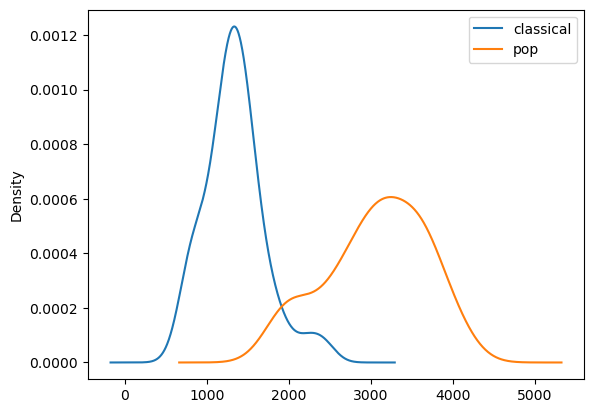

In [16]:
plt_pdf('spectral_centroid_mean') 

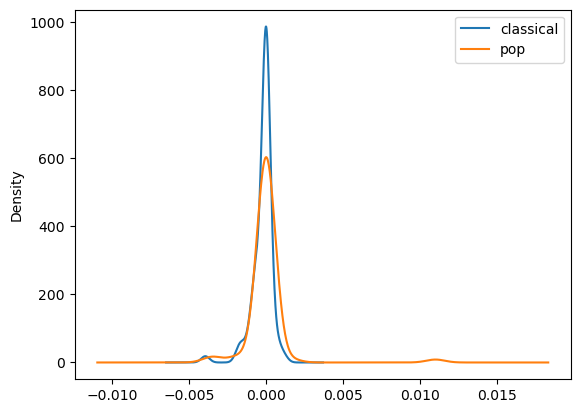

In [17]:
plt_pdf('harmony_mean') 

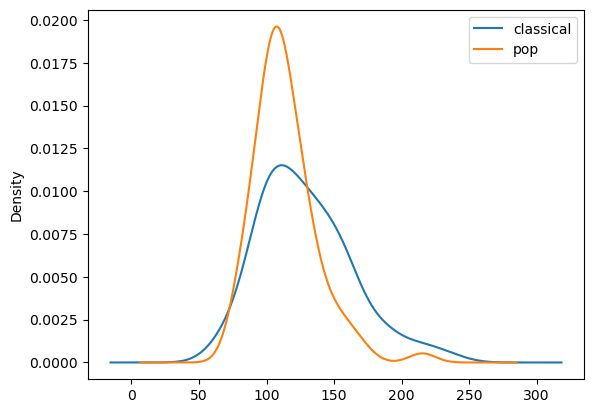

In [18]:
plt_pdf('tempo')

## Task 2. 10-way music genre classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

# train the 10-way data with training data and make prediction with the test data

In [21]:
data = preprocess('data/gztan_train.csv')
test_data = preprocess('data/gztan_test.csv')

In [22]:
prior, mean, sd = train(data)

In [23]:
test_prediction = predict(test_data, prior, mean, sd)

/var/folders/m_/mxy49jcn79z64fb2527q3vhh0000gn/T/ipykernel_83171/1461114564.py:4: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(norm.pdf(sample,mean,sd)).sum(axis=1) #likelihood of a single instance


In [24]:
evaluate(test_data, test_prediction)

(0.495, 0.8947368421052632, 0.85)

Modify your naive Bayes model to handle missing attributes in the test data. Recall from lecture that you can handle missing attributes at test by skipping the missing attributes and computing the posterior probability from the non-missing attributes. Randomly delete some attributes from the provided test set to test how robust your model is to missing data. In your write-up, evaluate how your model's performance changes as the amount of missing data increases.

In [28]:
# predict the label of one instance that can handle missing attributes
def predict_from_one_sample(sample, prior, mean, sd):
    prior = np.log(prior)
    likelihood = np.nansum(np.log(norm.pdf(sample,mean,sd)),axis=1) #likelihood of a single instance
    joint_prob = prior + likelihood
    posterior = joint_prob - np.log(np.sum(np.exp(joint_prob)))
    prediction = posterior.index[np.argmax(posterior)]
    return prediction

In [29]:
# create missing data randomly
test_data_tmp = test_data.copy()
for col in test_data_tmp.drop(columns='label').columns:
    test_data_tmp.loc[np.random.choice(test_data.index,300), col] = np.nan
test_data_tmp

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,NaN,NaN,NaN,0.002373,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48.120598,-0.283518,51.106190,0.531217,NaN,blues
1,NaN,NaN,NaN,NaN,1070.106615,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.259739,NaN,NaN,blues
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.590565,blues
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116774.735699,NaN,NaN,...,NaN,NaN,NaN,0.009554,NaN,NaN,NaN,NaN,NaN,blues
4,NaN,0.095015,0.07711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,105.847221,NaN,NaN,NaN,NaN,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,273423.385148,2249.878670,NaN,5213.208461,530034.605845,...,NaN,NaN,NaN,9.795698,NaN,NaN,NaN,NaN,NaN,rock
196,NaN,NaN,NaN,NaN,2628.863788,NaN,NaN,NaN,NaN,461787.640217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82426.016726,NaN,NaN,...,NaN,NaN,NaN,1.881229,NaN,NaN,NaN,NaN,NaN,rock
198,0.432142,NaN,NaN,0.000322,NaN,NaN,1927.293153,NaN,NaN,804215.439129,...,NaN,-12.845291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock


In [30]:
# find the accuracy, precision and recall while having missing values
prior, mean, sd = train(data)
test_prediction = predict(test_data_tmp, prior, mean, sd)
evaluate(test_data_tmp, test_prediction)

/var/folders/m_/mxy49jcn79z64fb2527q3vhh0000gn/T/ipykernel_83171/2143337610.py:4: RuntimeWarning: divide by zero encountered in log
  likelihood = np.nansum(np.log(norm.pdf(sample,mean,sd)),axis=1) #likelihood of a single instance


(0.38, 0.6818181818181818, 0.75)